# Bike Sharing Rebalancing Problem

The following implementation is derivated from the following paper: https://www.sciencedirect.com/science/article/abs/pii/S0305048313001187


## Introduction

| Variable Name  | Description |
| ------------- | ------------- |
| <i>V</i>   | Set of vertices |
| <i>A</i>   | Set of arcs  |
| <i>n</i>   | Number of stations |
| <i>m</i>   |  Number of vehicles  |
| <i>Q</i>   | Vehicle capacity |
| <i>q<sub>i</sub></i>  |  Demand at vertex i  |
| <i>c<sub>ij</sub></i>  |  Cost of arc (i,j)  |

In [96]:
#Importing cplex API
import sys
try:
    import docplex.cp
except:
    if hasattr(sys, 'real_prefix'):
        #we are in a virtual env.
        !pip install docplex
    else:
        !pip install --user docplex# Bike Sharing Rebalancing Problem
        
#Importing numpy and random generator
import numpy as np
rand = np.random

#Importing pyplot
import matplotlib.pyplot as plt

#Importing docplex model
from docplex.mp.model import Model

c:\python37\lib\site-packages\docplex\mp\__init__.py:35: RuntimeWarning: docplex is not officially supported on 32 bits. Use it at your own risk.
  warnings.warn("docplex is not officially supported on 32 bits. Use it at your own risk.", RuntimeWarning)


In [89]:
#Initial values
n = 8                                          # amount of stations (Reggio-Emilia)
m = 2                                            # amount of vehicles
Q = 10                                           # vehicles capacity
V = [0] + [i for i in range(1, n+2)]           # stations(including starting deposit and end deposit)
A = [(i, j) for i in V for j in V]               # edges
q = {i: rand.randint(-Q, Q) for i in V}           # demand along edges
q[0] = 0

In [90]:
# Generating random coordinates and computing the distances using euclidian distance
coord = rand.rand(len(V), 2) * 500

c = {(i, j): 
        np.hypot(coord[i][0]-coord[j][0], coord[i][1]-coord[j][1]) 
             for i, j in A}       

coord

array([[386.11150917, 463.58714415],
       [307.32601362, 304.53188462],
       [342.34243285, 125.50648371],
       [418.9188184 ,  59.30780848],
       [398.61737088, 474.50213374],
       [ 74.0314382 , 453.43599243],
       [394.18666273, 384.20292067],
       [299.24824151, 221.07280877],
       [361.51900991, 208.30912472],
       [113.40519772, 227.11367046]])

(56.78706919532611, 436.16318740643374, 38.54809221263755, 495.26185000265906)

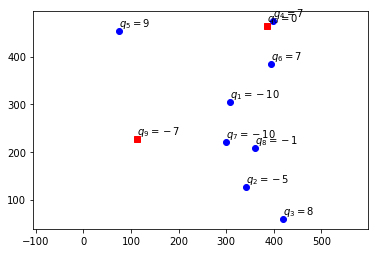

In [94]:
for point in coord[1:]:   
    plt.scatter(point[0], point[1], c='b')

for i in V:
    plt.annotate('$q_%d=%d$' % (i, q[i]), (coord[i][0], coord[i][1]+10))

end = len(V) -1 #Ending deposit index
plt.plot(coord[0][0], coord[0][1], c='r', marker='s') #marker=(5, 1)
plt.plot(coord[end][0], coord[end][1], c='r', marker='s') 
plt.axis('equal')

In [97]:
f4 = Model('Formulation-F4')


294.4620557177349